<a href="https://colab.research.google.com/github/leilaabdel/breast-cancer-multiomic-networks/blob/main/notebooks/network_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
G_undir = pickle.load(open(ROOT + '/data/undirected_graph.pickle' , 'rb'))
G_dir = pickle.load(open(ROOT + '/data/directed_graph.pickle' , 'rb'))

## Clustering

In [ ]:
# I read the documentation for this function and it implmenets the Chung Laplacian Equation
L_C = nx.directed_combinatorial_laplacian_matrix(G_dir)


In [ ]:
import scipy
# w are the eigenvalues
# v are the eigenvectors
w, v = scipy.linalg.eig(L_C)

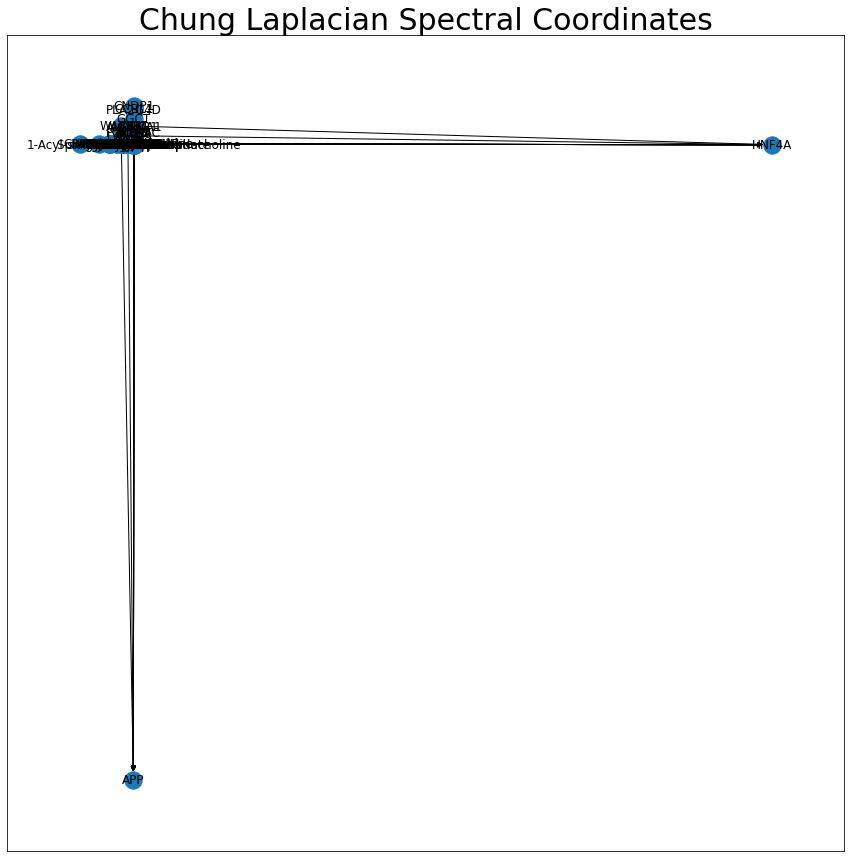

In [ ]:
x = v[:,1]
y = v[:,2]
ns = list(G_dir.nodes())
spectral_coordinates = {ns[i] : [float(x[i]), float(y[i])] for i in range(len(x))}
figure = plt.figure(figsize=(15,15))
nx.draw_networkx(G_dir , pos = spectral_coordinates)
plt.title("Chung Laplacian Spectral Coordinates" , fontsize=30)
plt.show()


In [ ]:
X = []
for i , j in spectral_coordinates.values():
  X.append((i,j))

In [ ]:
X = np.asarray(X)
X.shape

(276, 2)

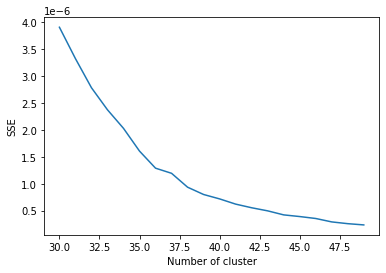

In [ ]:
from sklearn.cluster import KMeans
data = pd.DataFrame()

sse = {}
for k in range(30, 50):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=50, random_state=0).fit(X)
groupings = kmeans.labels_

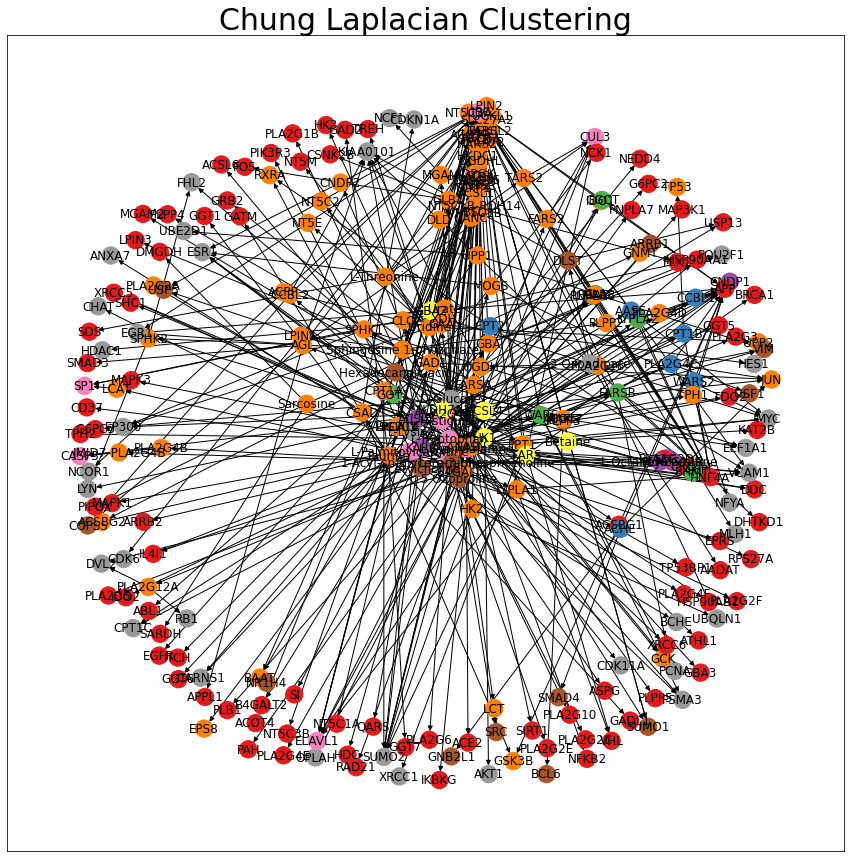

In [ ]:
figure = plt.figure(figsize=(15,15))
nx.draw_networkx(G_dir , pos = pos , node_color=groupings , cmap='Set1')
plt.title("Chung Laplacian Clustering" , fontsize=30)
plt.show()

## Undirected Graph

In [ ]:
A = nx.adjacency_matrix(G_undir)

In [ ]:
a_shape = A.shape
a_diagonals = A.sum(axis=1)
D = scipy.sparse.spdiags(a_diagonals.flatten(),
                         [0],
                         a_shape[0],
                         a_shape[1],
                         format='csr')

In [ ]:
L = (D - A)

In [ ]:
# w are the eigenvalues
# v are the eigenvectors
w, v = scipy.linalg.eig(L.todense())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


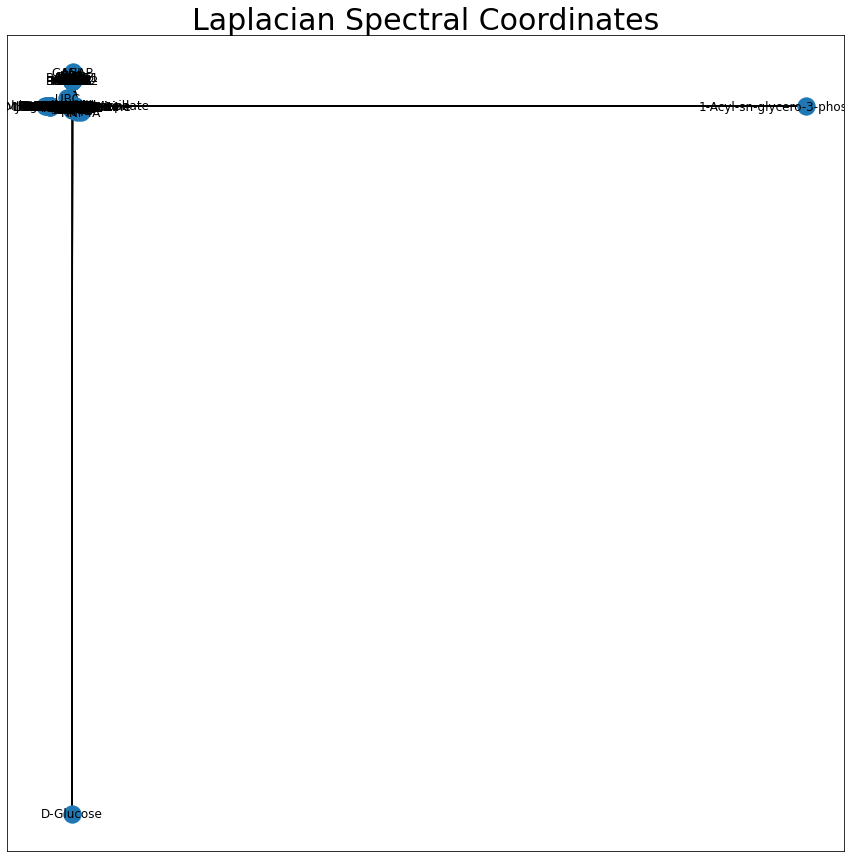

In [ ]:
x = v[:,1]
y = v[:,2]
ns = list(G_undir.nodes())
spectral_coordinates = {ns[i] : [float(x[i]), float(y[i])] for i in range(len(x))}
figure = plt.figure(figsize=(15,15))
nx.draw_networkx(G_undir , pos = spectral_coordinates)
plt.title("Laplacian Spectral Coordinates" , fontsize=30)
plt.show()

# As you can see there are more connected nodes over others

In [ ]:
X = []
for i , j in spectral_coordinates.values():
  X.append((i,j))

In [ ]:
X = np.asarray(X)
X.shape

(276, 2)

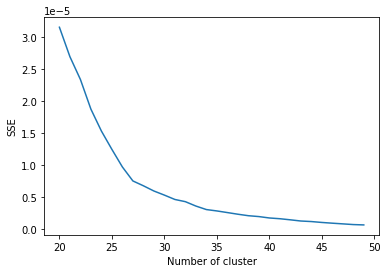

In [ ]:
from sklearn.cluster import KMeans
data = pd.DataFrame()

sse = {}
for k in range(20, 50):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=27, random_state=0).fit(X)
groupings = kmeans.labels_

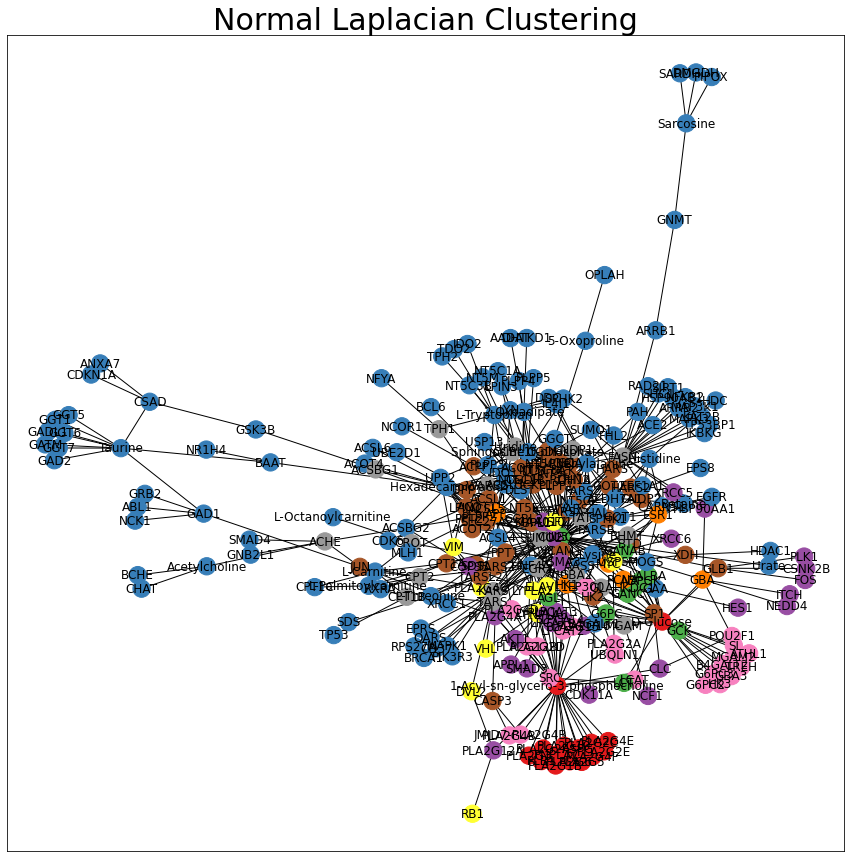

In [ ]:
figure = plt.figure(figsize=(15,15))
nx.draw_networkx(G_undir, node_color=groupings , cmap='Set1')
plt.title("Normal Laplacian Clustering" , fontsize=30)
plt.show()

In [ ]:
current_cent = nx.current_flow_betweenness_centrality(G_undir)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


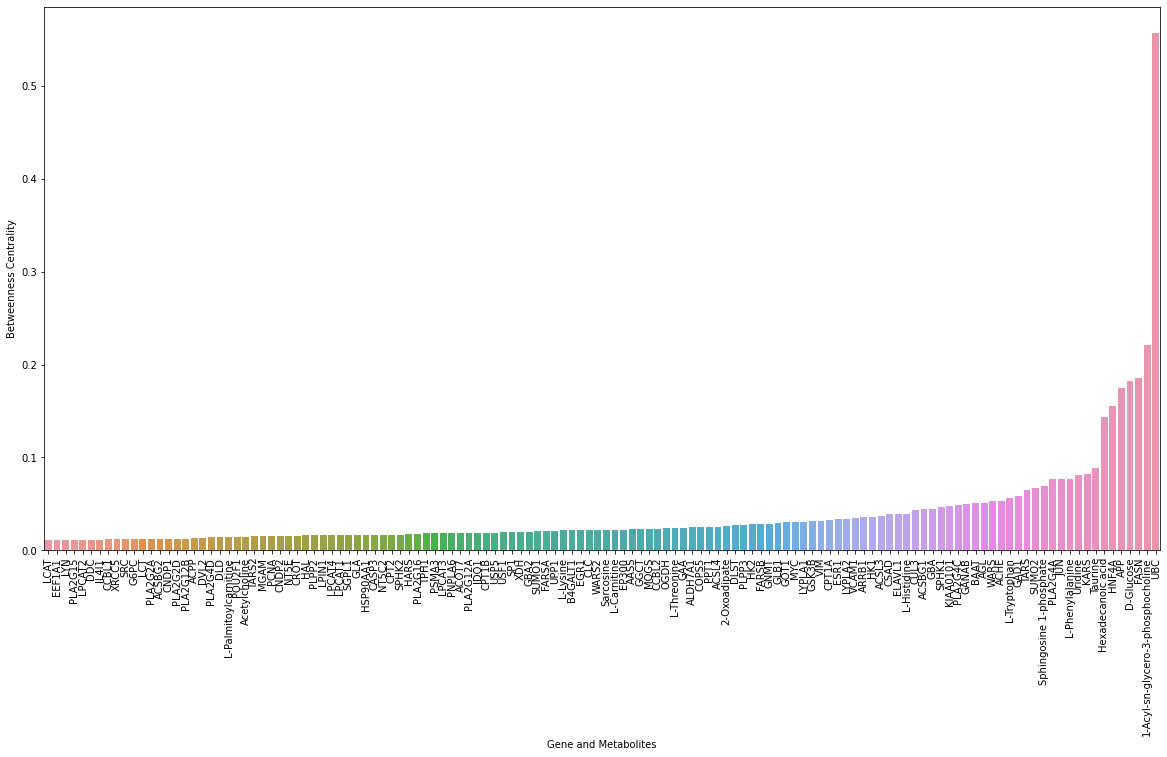

In [ ]:
gene_names = []
gene_betweenness = []
for key, values in current_cent.items():
  if(values > 0.01):
    gene_names.append(key)
    gene_betweenness.append(values)

a = np.argsort(gene_betweenness , axis=0)
gene_betweenness = np.asarray(gene_betweenness)
gene_names = np.asarray(gene_names)
gene_betweenness = gene_betweenness[a]
gene_names = gene_names[a]
between_df = pd.DataFrame({'Gene and Metabolites':gene_names , 'Betweenness Centrality':gene_betweenness})
plt.figure(figsize=(20,10))
bar = sns.barplot('Gene and Metabolites' , 'Betweenness Centrality' , data=between_df)

for item in bar.get_xticklabels():
    item.set_rotation(90)